# Part 1- Sentiment analysis of stock news

## Import the libraries

In [2]:
import os
import numpy as np
import pandas as pd
import yfinance as yf
import datetime
%matplotlib inline
import tensorflow as tf
from newsapi import NewsApiClient
from datetime import datetime, timedelta
from dotenv import load_dotenv
load_dotenv()

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer


Bad key "text.kerning_factor" on line 4 in
C:\Satheesh\Anaconda\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


## Fetch the stock OHLC

In [3]:
# Yahoo finance is used
stock_data= yf.download(tickers= 'MSFT', period= '1y')
stock_data.tail()
# stock_data.to_csv('stock_data.csv')

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-11,218.470001,218.910004,216.729996,217.490005,217.490005,23047000
2021-01-12,216.500000,217.100006,213.320007,214.929993,214.929993,23249300
2021-01-13,214.020004,216.759995,213.929993,216.339996,216.339996,20087100
2021-01-14,215.910004,217.460007,212.740005,213.020004,213.020004,29480800
2021-01-15,213.520004,214.509995,212.029999,212.649994,212.649994,31691500


In [4]:
stock_data.sort_index(ascending= False, inplace= True)
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-15,213.520004,214.509995,212.029999,212.649994,212.649994,31691500
2021-01-14,215.910004,217.460007,212.740005,213.020004,213.020004,29480800
2021-01-13,214.020004,216.759995,213.929993,216.339996,216.339996,20087100
2021-01-12,216.500000,217.100006,213.320007,214.929993,214.929993,23249300
2021-01-11,218.470001,218.910004,216.729996,217.490005,217.490005,23047000


In [5]:
# Get only the closing price and round to 2 decimals
stock_close= pd.DataFrame (round (stock_data['Close'], 2))
stock_close.head()

,Close
Date,
2021-01-15,212.65
2021-01-14,213.02
2021-01-13,216.34
2021-01-12,214.93
2021-01-11,217.49


In [6]:
# Calculate the daily returns
stock_close['returns']= stock_close.pct_change()*100
stock_close.tail()

,Close,returns
Date,,
2020-01-23,166.72,1.017935
2020-01-22,165.70,-0.611804
2020-01-21,166.50,0.482800
2020-01-17,167.10,0.360360
2020-01-16,166.17,-0.556553


### Download the VADER Lexicon

In [9]:
nltk.download('vader_lexicon')

# Initialize the sentiment analyzer
analyzer= SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sathe\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Fetch the news

In [10]:
# Import the libraries
import requests
import json

In [11]:
# Check for the STOCK_NEWS_API key
stock_news_api= os.getenv("STOCK_NEWS_API")
type (stock_news_api)

str

In [ ]:
# This was used to fetch the news, its has been converted to a CSV. Now, this cell is redundant
all_data = []
for i in range(1,101):
    request_url = f"https://stocknewsapi.com/api/v1?tickers=MSFT&items=50&page={i}&token="
    request_url= request_url+ stock_news_api
    response_data= requests.get(request_url).json()

    try:
        all_data = all_data + response_data["data"]
    except:
        # print(response_data)

In [ ]:
# df2 = pd.DataFrame(all_data)
# df2.to_csv("msft_news.csv")

In [12]:
df2 = pd.read_csv("msft_news.csv")
print(len(df2))

df2.drop(columns= ['Unnamed: 0', 'Unnamed: 0.1'], inplace= True)
df2.tail()

2700


,date,image_url,news_url,sentiment,source_name,text,tickers,title,topics,type
2695,"Sat, 11 Jan 2020 10:01:01 -0500",https://cdn.snapi.dev/images/v1/1/0/106315973-...,https://www.cnbc.com/2020/01/10/microsoft-has-...,Positive,CNBC,"For years, Microsoft has been criticized for h...",['MSFT'],Microsoft is taking big strides to make Surfac...,[],Article
2696,"Fri, 10 Jan 2020 15:43:00 -0500",https://cdn.snapi.dev/images/v1/f/r/foj2gvceo-...,https://www.zacks.com/stock/news/711996/micros...,Positive,Zacks Investment Research,Wedbush analyst Daniel Ives is hugely upbeat o...,['MSFT'],Microsoft's Azure Poised to Pop,[],Article
2697,"Fri, 10 Jan 2020 14:24:00 -0500",https://cdn.snapi.dev/images/v1/s/k/skype-logo...,https://www.cnet.com/news/microsoft-listened-t...,Neutral,CNET,Microsoft uses human reviewers to improve voic...,['MSFT'],Microsoft listened to Skype calls with 'no sec...,[],Article
2698,"Fri, 10 Jan 2020 13:29:22 -0500",https://cdn.snapi.dev/images/v1/s/o/software21...,https://investorplace.com/2020/01/3-top-blue-c...,Positive,InvestorPlace,Everyone wants to find big rewards without tak...,"['AAPL', 'MDT', 'MSFT']",3 Top Blue-Chip Stocks to Buy and Hold Now,[],Article
2699,"Fri, 10 Jan 2020 12:27:53 -0500",https://cdn.snapi.dev/images/v1/o/f/office-web...,https://www.geekwire.com/2020/microsoft-eyes-h...,Neutral,GeekWire,Microsoft has set its sights on a huge new off...,['MSFT'],Microsoft eyes huge new office building near i...,[],Article


In [13]:
df2.columns

Index(['date', 'image_url', 'news_url', 'sentiment', 'source_name', 'text',
       'tickers', 'title', 'topics', 'type'],
      dtype='object')

In [14]:
new_df = df2[['date', 'text', 'tickers', 'sentiment']]
new_df.head()

,date,text,tickers,sentiment
0,"Wed, 13 Jan 2021 14:14:40 -0500",We cannot state the slowdown in Microsoft's gr...,['MSFT'],Positive
1,"Wed, 13 Jan 2021 13:53:55 -0500",Microsoft is still worth significantly more ba...,['MSFT'],Positive
2,"Wed, 13 Jan 2021 07:00:00 -0500","EDMONTON, AB / ACCESSWIRE / January 13, 2021 /...","['MSFT', 'OSSIF']",Neutral
3,"Tue, 12 Jan 2021 18:48:15 -0500","In the latest trading session, Microsoft (MSFT...",['MSFT'],Negative
4,"Tue, 12 Jan 2021 16:05:00 -0500","REDMOND, Wash., Jan. 12, 2021 /PRNewswire/ -- ...",['MSFT'],Neutral


In [15]:
new_df['date']= new_df['date'].astype(str)
new_df['date']= pd.to_datetime(new_df['date'], utc= True).dt.date
new_df.head()

C:\Satheesh\Anaconda\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Satheesh\Anaconda\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,date,text,tickers,sentiment
0,2021-01-13,We cannot state the slowdown in Microsoft's gr...,['MSFT'],Positive
1,2021-01-13,Microsoft is still worth significantly more ba...,['MSFT'],Positive
2,2021-01-13,"EDMONTON, AB / ACCESSWIRE / January 13, 2021 /...","['MSFT', 'OSSIF']",Neutral
3,2021-01-12,"In the latest trading session, Microsoft (MSFT...",['MSFT'],Negative
4,2021-01-12,"REDMOND, Wash., Jan. 12, 2021 /PRNewswire/ -- ...",['MSFT'],Neutral


In [16]:
new_df.set_index('date', inplace= True)
new_df.head()

,text,tickers,sentiment
date,,,
2021-01-13,We cannot state the slowdown in Microsoft's gr...,['MSFT'],Positive
2021-01-13,Microsoft is still worth significantly more ba...,['MSFT'],Positive
2021-01-13,"EDMONTON, AB / ACCESSWIRE / January 13, 2021 /...","['MSFT', 'OSSIF']",Neutral
2021-01-12,"In the latest trading session, Microsoft (MSFT...",['MSFT'],Negative
2021-01-12,"REDMOND, Wash., Jan. 12, 2021 /PRNewswire/ -- ...",['MSFT'],Neutral


In [17]:
# Merge the pct change with the above df
text_sentiment_returns= pd.merge(new_df, stock_close, left_index= True, right_index= True)
text_sentiment_returns.sort_index(ascending= False, inplace= True)
text_sentiment_returns.head()

,text,tickers,sentiment,Close,returns
2021-01-13,"EDMONTON, AB / ACCESSWIRE / January 13, 2021 /...","['MSFT', 'OSSIF']",Neutral,216.34,1.558539
2021-01-13,Microsoft is still worth significantly more ba...,['MSFT'],Positive,216.34,1.558539
2021-01-13,We cannot state the slowdown in Microsoft's gr...,['MSFT'],Positive,216.34,1.558539
2021-01-12,Data indicates The Dogs of the Dow outperform ...,"['AMGN', 'CSCO', 'CVX', 'DOW', 'IBM', 'KO', 'M...",Neutral,214.93,-0.651752
2021-01-12,Microsoft (MSFT) has released its new Surface ...,['MSFT'],Positive,214.93,-0.651752


In [18]:
text_sentiment_returns.reset_index(inplace= True)
text_sentiment_returns.head()

,index,text,tickers,sentiment,Close,returns
0,2021-01-13,"EDMONTON, AB / ACCESSWIRE / January 13, 2021 /...","['MSFT', 'OSSIF']",Neutral,216.34,1.558539
1,2021-01-13,Microsoft is still worth significantly more ba...,['MSFT'],Positive,216.34,1.558539
2,2021-01-13,We cannot state the slowdown in Microsoft's gr...,['MSFT'],Positive,216.34,1.558539
3,2021-01-12,Data indicates The Dogs of the Dow outperform ...,"['AMGN', 'CSCO', 'CVX', 'DOW', 'IBM', 'KO', 'M...",Neutral,214.93,-0.651752
4,2021-01-12,Microsoft (MSFT) has released its new Surface ...,['MSFT'],Positive,214.93,-0.651752


### Create the sentiment scores DF

In [19]:
polarity= []

for content in text_sentiment_returns['text']:
    try:
        # Calculate the polarity score
        sentiment= analyzer.polarity_scores(content)
        compound= sentiment['compound']
        
        polarity.append({
            "compound": compound,
        })
        
    except AttributeError:
        pass
    
# Create dataframe
polarity_df= pd.DataFrame(polarity)
polarity_df.head()

,compound
0,0.9325
1,0.8360
2,0.1027
3,0.6908
4,0.0000


In [20]:
text_sentiment_returns_polarity= pd.concat([text_sentiment_returns, polarity_df], axis= 1)
# text_sentiment_returns_polarity.drop(columns= 'level_0', inplace= True)
text_sentiment_returns_polarity.head()

,index,text,tickers,sentiment,Close,returns,compound
0,2021-01-13,"EDMONTON, AB / ACCESSWIRE / January 13, 2021 /...","['MSFT', 'OSSIF']",Neutral,216.34,1.558539,0.9325
1,2021-01-13,Microsoft is still worth significantly more ba...,['MSFT'],Positive,216.34,1.558539,0.8360
2,2021-01-13,We cannot state the slowdown in Microsoft's gr...,['MSFT'],Positive,216.34,1.558539,0.1027
3,2021-01-12,Data indicates The Dogs of the Dow outperform ...,"['AMGN', 'CSCO', 'CVX', 'DOW', 'IBM', 'KO', 'M...",Neutral,214.93,-0.651752,0.6908
4,2021-01-12,Microsoft (MSFT) has released its new Surface ...,['MSFT'],Positive,214.93,-0.651752,0.0000


In [21]:
text_sentiment_returns_polarity.set_index('index', inplace= True)
text_sentiment_returns_polarity.head()

,text,tickers,sentiment,Close,returns,compound
index,,,,,,
2021-01-13,"EDMONTON, AB / ACCESSWIRE / January 13, 2021 /...","['MSFT', 'OSSIF']",Neutral,216.34,1.558539,0.9325
2021-01-13,Microsoft is still worth significantly more ba...,['MSFT'],Positive,216.34,1.558539,0.8360
2021-01-13,We cannot state the slowdown in Microsoft's gr...,['MSFT'],Positive,216.34,1.558539,0.1027
2021-01-12,Data indicates The Dogs of the Dow outperform ...,"['AMGN', 'CSCO', 'CVX', 'DOW', 'IBM', 'KO', 'M...",Neutral,214.93,-0.651752,0.6908
2021-01-12,Microsoft (MSFT) has released its new Surface ...,['MSFT'],Positive,214.93,-0.651752,0.0000


In [22]:
# Grouping the sentiments by date and taking the average compound score
avg_text_sentiment_returns_polarity= text_sentiment_returns_polarity.groupby('index').mean()
avg_text_sentiment_returns_polarity.sort_index(ascending= False, inplace= True)
avg_text_sentiment_returns_polarity.head()

,Close,returns,compound
index,,,
2021-01-13,216.34,1.558539,0.623733
2021-01-12,214.93,-0.651752,0.138160
2021-01-11,217.49,1.191085,0.346482
2021-01-08,219.62,0.979355,-0.128000
2021-01-07,218.29,-0.605591,0.386833


In [23]:
avg_text_sentiment_returns_polarity_ascending= avg_text_sentiment_returns_polarity.sort_index()
avg_text_sentiment_returns_polarity_ascending.head()

,Close,returns,compound
index,,,
2020-01-16,166.17,-0.556553,-0.004255
2020-01-17,167.10,0.360360,0.163464
2020-01-21,166.50,0.482800,0.357500
2020-01-22,165.70,-0.611804,0.393555
2020-01-23,166.72,1.017935,0.328531


## Tokenization, Lemmatization

In [24]:
# Importing the Libraries and Functions
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [25]:
# Instantiate the lemmatizer
lemmatizer= WordNetLemmatizer()

In [26]:
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the stop words
    stop_words= set (stopwords.words('english'))
   
    # Remove the punctuation and substitute
    non_alpha= re.compile('[^a-zA-Z ]')
    re_clean= non_alpha.sub('', str (text))
    
    # Tokenize the words
    words= word_tokenize(re_clean)
    
    # Lemmatize Article words into root words
    root_words= []
    for values in words:
        root_words.append(lemmatizer.lemmatize(values))
        
    # Remove stop words and Convert the words to lowercase
    tokens= []
    for all_words in root_words:
        if all_words.lower() not in stop_words:
            tokens.append(all_words.lower())
    
    return tokens

In [27]:
# Apply the tokenizer function to the news text column
text_sentiment_returns_polarity['tokenized']= text_sentiment_returns_polarity['text'].apply(tokenizer)
# text_sentiment_returns_polarity.set_index('index', inplace= True)
text_sentiment_returns_polarity.head()

,text,tickers,sentiment,Close,returns,compound,tokenized
index,,,,,,,
2021-01-13,"EDMONTON, AB / ACCESSWIRE / January 13, 2021 /...","['MSFT', 'OSSIF']",Neutral,216.34,1.558539,0.9325,"[edmonton, ab, accesswire, january, onesoft, s..."
2021-01-13,Microsoft is still worth significantly more ba...,['MSFT'],Positive,216.34,1.558539,0.8360,"[microsoft, still, worth, significantly, based..."
2021-01-13,We cannot state the slowdown in Microsoft's gr...,['MSFT'],Positive,216.34,1.558539,0.1027,"[state, slowdown, microsofts, growth, evaluati..."
2021-01-12,Data indicates The Dogs of the Dow outperform ...,"['AMGN', 'CSCO', 'CVX', 'DOW', 'IBM', 'KO', 'M...",Neutral,214.93,-0.651752,0.6908,"[data, indicates, dogs, dow, outperform, long,..."
2021-01-12,Microsoft (MSFT) has released its new Surface ...,['MSFT'],Positive,214.93,-0.651752,0.0000,"[microsoft, msft, ha, released, new, surface, ..."


## N-grams, WordCloud

In [28]:
# Import the libraries and functions
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [15.0, 15.0]

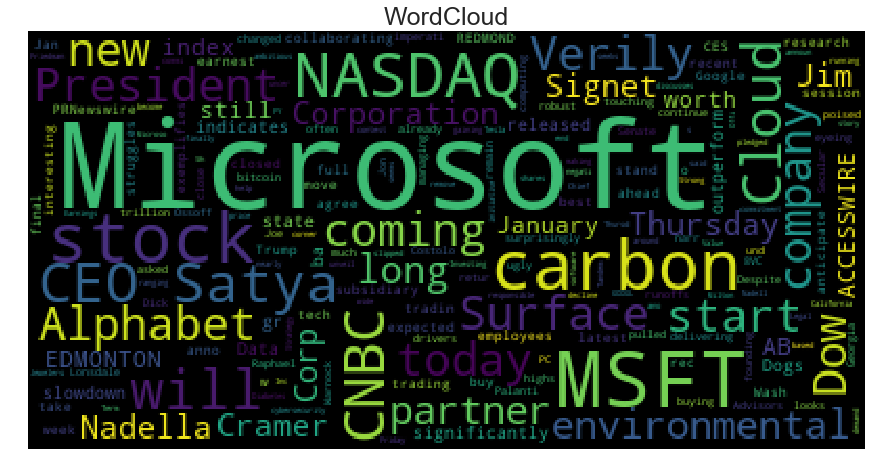

In [29]:
# Generate the word cloud
returns_big_text= ''.join (str (text_sentiment_returns_polarity["text"]))

returns_wc= WordCloud().generate(returns_big_text)

plt.imshow(returns_wc)
plt.axis("off")
plt.title('WordCloud', fontsize= 25)
plt.show()

## Part 2- Regression and Deep Learning prediction of returns

## Linear Regression

In [30]:
# Create a train/test split for the data
train= avg_text_sentiment_returns_polarity['2020-10':'2020-01']
test= avg_text_sentiment_returns_polarity['2021-01':'2020-11']

In [32]:
# Create X_train, X_test, y_train, y_test
X_train= train['compound'].to_frame()
y_train= train['returns']

X_test= test['compound'].to_frame()
y_test= test['returns']

In [33]:
# Create a linear regression model and fit it to the training data
from sklearn.linear_model import LinearRegression

lr_model= LinearRegression()
lr_model.fit (X_train, y_train)

LinearRegression()

## Make predictions using the test data

In [34]:
# Make a prediction of "y" values using just the test dataset
lr_predictions= lr_model.predict(X_test)

In [35]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a DataFrame:
results= y_test.to_frame()
results['predicted return']= lr_predictions
results.head()

,returns,predicted return
index,,
2021-01-13,1.558539,0.403227
2021-01-12,-0.651752,-0.136819
2021-01-11,1.191085,0.094872
2021-01-08,0.979355,-0.432838
2021-01-07,-0.605591,0.139751


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002927EC12288>,
      dtype=object)

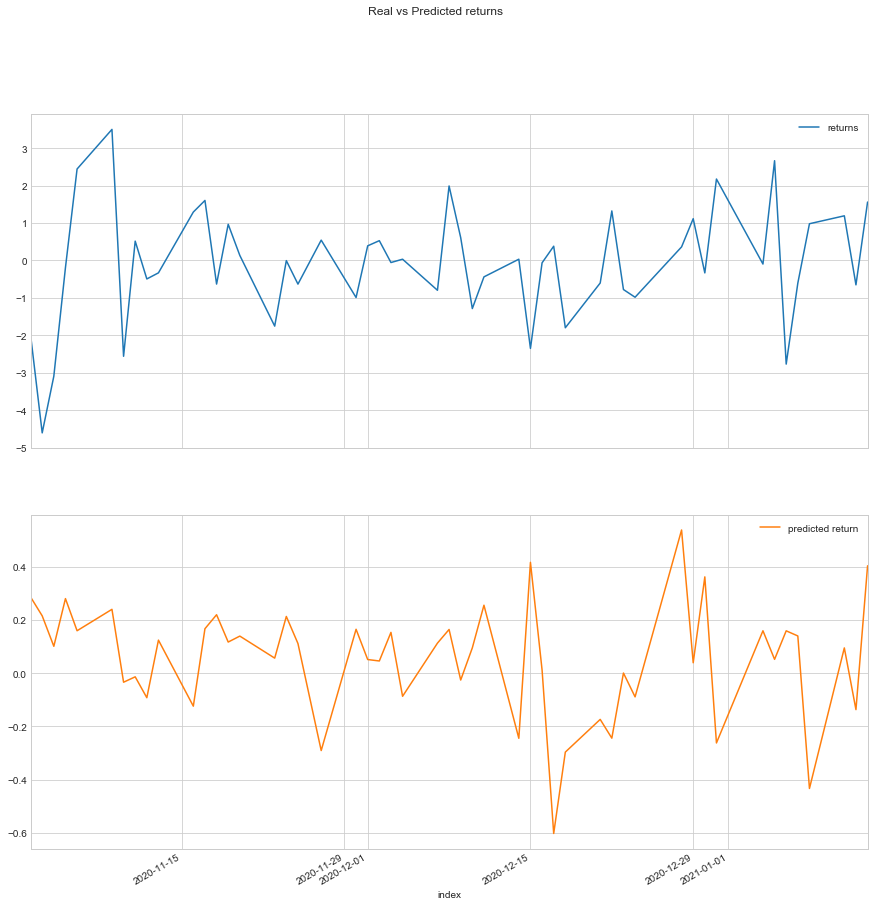

In [155]:
results.plot(subplots= True, title= 'Real vs Predicted returns')

## Deep Learning

In [37]:
import hvplot.pandas
# Set the random seed for reproducibility
from numpy.random import seed
seed (1)
from tensorflow import random
random.set_seed(2)

#### Define a function for features and target

In [38]:
def window_data(df, window, feature_col_number, target_col_number):
    """
    This function accepts the column number for the features (X) and the target (y).
    It chunks the data up with a rolling window of Xt - window to predict Xt.
    It returns two numpy arrays of X and y.
    """
    X = []
    y = []
    
    for rows in range(len(df) - window - 1):
        features = df.iloc[rows:(rows + window), feature_col_number]
        target = df.iloc[(rows + window), target_col_number]
        
        X.append(features)
        y.append(target)
    
    return np.array(X), np.array(y).reshape(-1, 1)

In [137]:
# Predict returns using a 10 day window of previous returns
window = 1

# The dataframe under consideration is text_sentiment_returns_polarity
# Column 2- compund score is the feature column
# Column 1- returns is the target column
feature_col_number = 2
target_col_number = 1

X, y = window_data(avg_text_sentiment_returns_polarity_ascending, window, feature_col_number, target_col_number)

In [138]:
print (f"X sample values:\n{X[:5]} \n")
print (f"y sample values:\n{y[:5]} \n")
print (f"Length of X: {len (X)}")

X sample values:
[[-0.00425455]
 [ 0.16346429]
 [ 0.3575    ]
 [ 0.39355455]
 [ 0.32853077]] 

y sample values:
[[ 0.36036036]
 [ 0.48280024]
 [-0.61180422]
 [ 1.01793505]
 [ 1.70076411]] 

Length of X: 248


#### Split the data into training and testing

In [139]:
# Use 70% of the data for training and the remainder for testing
split= int (0.7* len(X))

X_train= X[: split]
X_test= X[split: ]

y_train= y[: split]
y_test= y[split: ]

In [140]:
from sklearn.preprocessing import MinMaxScaler

# Use the MinMaxScaler to scale data between 0 and 1.
scaler= MinMaxScaler()

scaler.fit(X)
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

scaler.fit(y)
y_train_scaled= scaler.transform(y_train)
y_test_scaled= scaler.transform(y_test)

In [141]:
print (f"X_train_scaled sample values:\n {X_train_scaled[:2]}\n")
print (f"y_train_scaled sample values:\n {y_train_scaled[:2]}")

X_train_scaled sample values:
 [[0.26905364]
 [0.43276163]]

y_train_scaled sample values:
 [[0.43073694]
 [0.43485475]]


In [142]:
print (f"X_train_scaled shape: {X_train_scaled.shape}")
print (f"X_test_scaled shape: {X_test_scaled.shape}")
print (f"y_train_scaled shape: {y_train_scaled.shape}")
print (f"y_test_scaled shape: {y_test_scaled.shape}")

X_train_scaled shape: (173, 1)
X_test_scaled shape: (75, 1)
y_train_scaled shape: (173, 1)
y_test_scaled shape: (75, 1)


#### Reshape the feature data

In [143]:
# Reshape the features for the model
X_train_reshaped= X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))

X_test_reshaped= X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

In [144]:
print (f"X_train_reshaped shape: {X_train_reshaped.shape}")
print (f"X_test_reshaped shape: {X_test_reshaped.shape}")

X_train_reshaped shape: (173, 1, 1)
X_test_reshaped shape: (75, 1, 1)


### Build and train the LSTM RNN

In [145]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

### Defining the LSTM RNN model structure

In this model the previous closing price is used to predict the next closing price

In [146]:
# Define the LSTM model
nn_model= Sequential()

number_units= 10
dropout_fraction= 0.1

# 1st Neural Network layer
nn_model.add (LSTM (units= number_units, return_sequences= True, input_shape= (X_train_reshaped.shape[1], 1)))
nn_model.add (Dropout (dropout_fraction))

# 2nd Layer
nn_model.add (LSTM (units= number_units, return_sequences= True))
nn_model.add (Dropout (dropout_fraction))

# 3rd Layer
nn_model.add (LSTM (units= number_units))
nn_model.add (Dropout (dropout_fraction))

# Output NN layer
nn_model.add (Dense (units= 1))

In [147]:
# Compile the model
nn_model.compile (loss= 'mean_squared_error', optimizer= 'adam')

In [148]:
# Summarize the model
nn_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 1, 10)             480       
_________________________________________________________________
dropout_12 (Dropout)         (None, 1, 10)             0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 1, 10)             840       
_________________________________________________________________
dropout_13 (Dropout)         (None, 1, 10)             0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 10)                840       
_________________________________________________________________
dropout_14 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

#### Train the LSTM model

In [149]:
# Do not shuffle the data
nn_model.fit (X_train_reshaped, y_train_scaled, epochs= 10, batch_size= 5, shuffle= False)

Epoch 1/10
35/35 [==============================] - 3s 3ms/step - loss: 0.1736
Epoch 2/10
35/35 [==============================] - 0s 2ms/step - loss: 0.1111
Epoch 3/10
35/35 [==============================] - 0s 3ms/step - loss: 0.0453
Epoch 4/10
35/35 [==============================] - 0s 3ms/step - loss: 0.0169
Epoch 5/10
35/35 [==============================] - 0s 3ms/step - loss: 0.0189
Epoch 6/10
35/35 [==============================] - 0s 3ms/step - loss: 0.0169
Epoch 7/10
35/35 [==============================] - 0s 2ms/step - loss: 0.0160
Epoch 8/10
35/35 [==============================] - 0s 3ms/step - loss: 0.0170
Epoch 9/10
35/35 [==============================] - 0s 2ms/step - loss: 0.0142
Epoch 10/10
35/35 [==============================] - 0s 2ms/step - loss: 0.0159


## Model performance

In [150]:
nn_model.evaluate (X_test_reshaped, y_test_scaled)

3/3 [==============================] - 1s 2ms/step - loss: 0.0031


0.003093319246545434

In [151]:
# Make predictions
predicted= nn_model.predict (X_test_reshaped)
predicted[:5]

array([[0.41323996],
       [0.40650377],
       [0.4128543 ],
       [0.3883427 ],
       [0.41398552]], dtype=float32)

In [152]:
# Inverse transform the array to get the original values
predicted_prices= scaler.inverse_transform (predicted)
real_prices= scaler.inverse_transform(y_test_scaled.reshape(-1,1))

In [153]:
# Create a DataFrame of Real and Predicted values
real_predicted = pd.DataFrame(
    {
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
    }, 
    index = avg_text_sentiment_returns_polarity_ascending.index[-len(real_prices): ]
) 

real_predicted.head()

,Real,Predicted
index,,
2020-09-28,-0.773491,-0.159899
2020-09-29,1.051819,-0.360194
2020-09-30,-1.459611,-0.171366
2020-10-01,-1.002542,-0.900199
2020-10-02,3.040885,-0.137730


In [154]:
# Plot the real vs predicted values as a line chart
real_predicted.hvplot(title= 'Real vs predicted returns')

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [70]:
# Save the model as json
from pathlib import Path
nn_json= nn_model.to_json()
file_path= Path("./csv/nn_model.json")

with open (file_path, 'w') as json_file:
    json_file.write (nn_json)
    
# Save weights
file_path= ("./csv/model.h5")
nn_model.save_weights (file_path)

In [71]:
# Load the model to predict values
from tensorflow.keras.models import model_from_json

# Load json and create model
file_path= Path ("./csv/nn_model.json")
with open (file_path, 'r') as json_file:
    json_read= json_file.read()

loaded_model= model_from_json (json_read)

# Load weights into new model
file_path= "./csv/model.h5"
loaded_model.load_weights(file_path)

## Sentiment analysis using Vader, RNN

In [57]:
def get_normalized_score(df):
    result= 0
    
    if df>= 0.1:
        result= 1
    else:
        result= 0
        
    return result

In [58]:
text_sentiment_returns_polarity['normalized']= text_sentiment_returns_polarity['compound'].apply(get_normalized_score)
text_sentiment_returns_polarity.head()

,text,tickers,sentiment,Close,returns,compound,tokenized,normalized
index,,,,,,,,
2021-01-13,"EDMONTON, AB / ACCESSWIRE / January 13, 2021 /...","['MSFT', 'OSSIF']",Neutral,216.34,1.558539,0.9325,"[edmonton, ab, accesswire, january, onesoft, s...",1
2021-01-13,Microsoft is still worth significantly more ba...,['MSFT'],Positive,216.34,1.558539,0.8360,"[microsoft, still, worth, significantly, based...",1
2021-01-13,We cannot state the slowdown in Microsoft's gr...,['MSFT'],Positive,216.34,1.558539,0.1027,"[state, slowdown, microsofts, growth, evaluati...",1
2021-01-12,Data indicates The Dogs of the Dow outperform ...,"['AMGN', 'CSCO', 'CVX', 'DOW', 'IBM', 'KO', 'M...",Neutral,214.93,-0.651752,0.6908,"[data, indicates, dogs, dow, outperform, long,...",1
2021-01-12,Microsoft (MSFT) has released its new Surface ...,['MSFT'],Positive,214.93,-0.651752,0.0000,"[microsoft, msft, ha, released, new, surface, ...",0


In [98]:
text_sentiment_returns_polarity['normalized'].value_counts()

1    1321
0    1137
Name: normalized, dtype: int64

There are 1321 news articles with positive sentiment in the last 1 year, while 1137 news articles had a negative sentiment

#### Data preparation

In [59]:
X1= text_sentiment_returns_polarity['text'].values
y1= text_sentiment_returns_polarity['normalized'].values

In [60]:
# Create the train, test and validation datasets
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test= train_test_split (X1, y1)

X1_train, X1_val, y1_train, y1_val= train_test_split (X1_train, y1_train)

In [61]:
# Again Initialize the VADER sentiment analyzer
analyzer1= SentimentIntensityAnalyzer()

In [63]:
# Define 2 lists to store VADER sentiment scoring
y1_vader_pred= []
y1_vader_prob= []

In [64]:
# Score sentiment of test set using VADER
for comment in X1_test:
    y1_vader_prob.append(analyzer1.polarity_scores(comment)['pos'])
    
    sentiment_score= analyzer1.polarity_scores(comment)['compound']
    
    if sentiment_score>= 0.1:
        y1_vader_pred.append(1)
    else:
        y1_vader_pred.append(0)

In [65]:
from sklearn.preprocessing import MinMaxScaler

scaler1= MinMaxScaler()
scaler1.fit (np.array (y1_vader_prob).reshape(-1,1))

y1_vader_prob_norm= scaler1.transform (np.array (y1_vader_prob).reshape(-1,1))
y1_vader_prob_norm[:5]

array([[0.2652027 ],
       [0.35304054],
       [0.14527027],
       [0.42567568],
       [0.30236486]])

## Scoring Sentiment Using RNN LSTM

In [66]:
# Import the tokenizer method from Keras
from tensorflow.keras.preprocessing.text import Tokenizer

In [67]:
# Create an instance of Tokenizer and fit it with X
tokenizer= Tokenizer(lower= True)
tokenizer.fit_on_texts(X1)

In [68]:
# Print the first five elements of the encoded vocabulary
for content in list(tokenizer.word_index)[:5]:
    print (f"word: '{content}', token_num: {tokenizer.word_index[content]}")

word: 'the', token_num: 1
word: 'to', token_num: 2
word: 'microsoft', token_num: 3
word: 'and', token_num: 4
word: 'of', token_num: 5


In [69]:
# Transform the text data to numerical sequences
X1_seq= tokenizer.texts_to_sequences(X1)

In [70]:
# Contrast a sample numerical sequence with its text version
print("**Text comment**")
print ({X1[0]})

print ("**Numerical sequence representation**")
print (X1_seq[0])

**Text comment**
{'EDMONTON, AB / ACCESSWIRE / January 13, 2021 / OneSoft Solutions Inc. (TSXV:OSS)(OTCQB:OSSIF) (the "Company" or "OneSoft") is pleased to announce that one of the largest gas pipeline companies in the U.S.A. (the "Client") has entered into an agreement with the Company\'s wholly owned subsidiary, OneBridge Solutions Inc. ("OneBridge") to integrate Cognitive Integrity Management TM ("CIM") software-as-a-service solution into its integrity management practices for a major division of its pipeline operations.'}
**Numerical sequence representation**
[2096, 2097, 2098, 604, 1023, 213, 1131, 400, 108, 2666, 2099, 1734, 2100, 1, 34, 131, 1131, 8, 3708, 2, 1735, 12, 89, 5, 1, 530, 2101, 2667, 37, 7, 1, 38, 28, 6, 1, 3709, 22, 1132, 94, 35, 1285, 13, 1, 248, 3710, 380, 1736, 2668, 400, 108, 2668, 2, 1737, 3711, 2669, 381, 3712, 3713, 54, 15, 6, 120, 644, 94, 11, 2669, 381, 1459, 10, 6, 226, 1133, 5, 11, 2667, 179]


In [71]:
# Import the pad_sequences method from Keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding

In [72]:
# Set the pad size
max_words= 140

# Pad the sequences
X1_pad= pad_sequences (X1_seq, maxlen= max_words, padding= 'post')

### Create the training, validation, testing datasets

In [73]:
# Creating training, validation, and testing sets using the encoded data
X1_train_rnn, X1_test_rnn, y1_train_rnn, y1_test_rnn= train_test_split (X1_pad, y1)

X1_train_rnn, X1_val_rnn, y1_train_rnn, y1_val_rnn= train_test_split (X1_train_rnn, y1_train_rnn)

### Build and train the RNN LSTM model

In [74]:
# Model set-up
vocabulary_size= len (tokenizer.word_counts.keys())+ 1
embedding_size= 64

Define an RNN LSTM model as follows:

* _Layer 1:_ Add an `Embedding` layer using the `vocabulary_size` and `embedding_size` variables as the first two parameters, and setting `input_length=max_words` (the same size as the padding).

* _Layer 2:_ Add an LSTM layer with `280` units.

* _Output Layer:_ Add a `Dense` layer with `1` unit and `sigmoid` as activation function.

In [75]:
# Define the RNN LSTM model
nlp_model= Sequential()

# Layer 1
nlp_model.add (Embedding (vocabulary_size, embedding_size, input_length= max_words))

# Layer 2
nlp_model.add (LSTM (units= 280))

# Output layer
nlp_model.add (Dense (units= 1, activation= 'sigmoid'))

In [76]:
# Compile the model
nlp_model.compile (loss= 'binary_crossentropy',
                  optimizer= 'adam',
                  metrics= [
                      'accuracy',
                      tf.keras.metrics.TruePositives(name="tp"),
                      tf.keras.metrics.TrueNegatives(name="tn"),
                      tf.keras.metrics.FalsePositives(name="fp"),
                      tf.keras.metrics.FalseNegatives(name="fn"),
                      tf.keras.metrics.Precision(name= 'precision'),
                      tf.keras.metrics.Recall(name= 'recall'),
                      tf.keras.metrics.AUC(name= 'AUC')
                  ]
                  )

In [77]:
# Model summary
nlp_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 140, 64)           450560    
_________________________________________________________________
lstm_3 (LSTM)                (None, 280)               386400    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 281       
Total params: 837,241
Trainable params: 837,241
Non-trainable params: 0
_________________________________________________________________


In [78]:
# Training the model
batch_size= 1000
epochs= 10

nlp_model.fit (X1_train_rnn,
              y1_train_rnn,
              validation_data= (X1_val_rnn, y1_val_rnn),
              epochs= epochs,
              batch_size= batch_size,
              verbose= 0)

In [79]:
# Predict classes using the testing data
y1_predicted_rnn= nlp_model.predict_classes (X1_test_rnn, batch_size= 1000)

C:\Satheesh\Anaconda\envs\pyvizenv\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


## Model comparison

#### Accuracy score

In [80]:
from sklearn.metrics import accuracy_score

print("Vader Accuracy: %.2f" % (accuracy_score(y1_test, y1_vader_pred)))
print("RNN LSTM Accuracy %.2f" % (accuracy_score(y1_test_rnn, y1_predicted_rnn)))

Vader Accuracy: 1.00
RNN LSTM Accuracy 0.54


#### Confusion matrix

In [81]:
# Import the confusion_matrix method from sklearn
from sklearn.metrics import confusion_matrix

In [82]:
# Confusion matrtix metrics from Vader
tn_vader, fp_vader, fn_vader, tp_vader = confusion_matrix(y1_test, y1_vader_pred).ravel()

# Dataframe to display confusion matrix from Vader
cm_vader_df = pd.DataFrame(
    {
        "Positive(1)": [f"TP={tp_vader}", f"FP={fp_vader}"],
        "Negative(0)": [f"FN={fn_vader}", f"TN={tn_vader}"],
    },
    index=["Positive(1)", "Negative(0)"],
)
cm_vader_df.index.name = "Actual"
cm_vader_df.columns.name = "Predicted"
print("Confusion Matrix from Vader")
display(cm_vader_df)

Confusion Matrix from Vader


Predicted,Positive(1),Negative(0)
Actual,,
Positive(1),TP=347,FN=0
Negative(0),FP=0,TN=268


In [83]:
# Confusion matrtix metrics from the RNN LSTM model
tn_rnn, fp_rnn, fn_rnn, tp_rnn = confusion_matrix(y1_test_rnn, y1_predicted_rnn).ravel()

# Dataframe to display confusion matrix from the RNN LSTM model
cm_rnn_df = pd.DataFrame(
    {
        "Positive(1)": [f"TP={tp_rnn}", f"FP={fp_rnn}"],
        "Negative(0)": [f"FN={fn_rnn}", f"TN={tn_rnn}"],
    },
    index=["Positive(1)", "Negative(0)"],
)
cm_rnn_df.index.name = "Actual"
cm_rnn_df.columns.name = "Predicted"
print("Confusion Matrix from the RNN LSTM Model")
display(cm_rnn_df)

Confusion Matrix from the RNN LSTM Model


Predicted,Positive(1),Negative(0)
Actual,,
Positive(1),TP=332,FN=0
Negative(0),FP=283,TN=0


In [84]:
# Import the classification_report method from sklearn
from sklearn.metrics import classification_report

In [85]:
# Display classification report for Vader
print("Classification Report for Vader")
print(classification_report(y1_test, y1_vader_pred))

Classification Report for Vader
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       268
           1       1.00      1.00      1.00       347

    accuracy                           1.00       615
   macro avg       1.00      1.00      1.00       615
weighted avg       1.00      1.00      1.00       615



In [86]:
# Display classification report for the RNN LSTM Model
print("Classification Report for the RNN LSTM Model")
print(classification_report(y1_test_rnn, y1_predicted_rnn))

Classification Report for the RNN LSTM Model
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       283
           1       0.54      1.00      0.70       332

    accuracy                           0.54       615
   macro avg       0.27      0.50      0.35       615
weighted avg       0.29      0.54      0.38       615



C:\Satheesh\Anaconda\envs\pyvizenv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Plotting the ROC Curve

In [87]:
# Import the roc_curve and auc metrics from sklearn
from sklearn.metrics import roc_curve, auc

#### ROC Curve - VADER

Use the `roc_curve` method from `sklearn` to calculate the false positives (`fpr`) and true positives (`tpr`) rates passing as parameters the testing target sentiments (`y1_test`) and the normalized values of `y1_vader_prob` (e.g. `y1_vader_prob_norm`).

In [88]:
# Data for ROC Curve - VADER
fpr_test_vader, tpr_test_vader, thresholds_test_vader= roc_curve (y1_test, y1_vader_prob_norm)

In [89]:
# AUC for VADER\
auc_test_vader= auc(fpr_test_vader, tpr_test_vader)
auc_test_vader= round (auc_test_vader, 2)

In [90]:
# DF to plot ROC curve for vader
roc_test_vader_df= pd.DataFrame ({
    "FPR Test": fpr_test_vader,
    "TPR Test": tpr_test_vader
}
)

roc_test_vader_df.head()

,FPR Test,TPR Test
0,0.0,0.000000
1,0.0,0.002882
2,0.0,0.072046
3,0.0,0.077810
4,0.0,0.080692


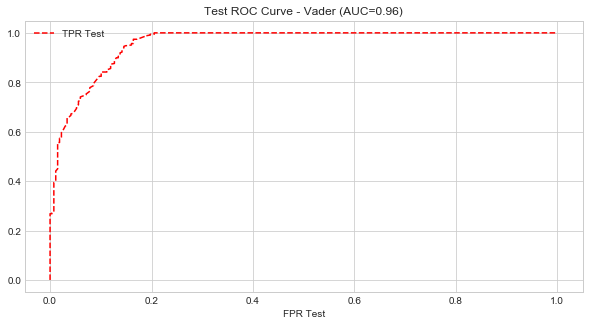

In [91]:
roc_test_vader_df.plot(
    x="FPR Test",
    y="TPR Test",
    color="red",
    style="--",
    xlim=([-0.05, 1.05]),
    figsize= (10,5),
    title=f"Test ROC Curve - Vader (AUC={auc_test_vader})",
)

#### ROC Curve RNN LSTM

Use the `predict()` method from the RNN LSTM model to predict the sentiment of the testing data `X1_test_rnn`. Set `batch_size=1000` to speed up the predictions and store the results in a variable called `test_predictions_rnn`.

In [92]:
# Making predictions to feed the ROC curve
test_predictions_rnn= nlp_model.predict (X1_test_rnn, batch_size= 1000)
test_predictions_rnn[:5]

array([[0.5414702],
       [0.5414702],
       [0.5414702],
       [0.5414702],
       [0.5414702]], dtype=float32)

In [93]:
# Data for RNN LSTM ROC Curve
fpr_test_rnn, tpr_test_rnn, thresholds_test_rnn= roc_curve (y1_test_rnn, test_predictions_rnn)

In [94]:
# AUC for RNN LSTM model
auc_test_rnn= auc (fpr_test_rnn, tpr_test_rnn)
auc_test_rnn= round (auc_test_rnn, 2)

In [95]:
# DF to plot RNN LSTM ROC curve
roc_test_rnn_df= pd.DataFrame ({
    "FPR Test": fpr_test_rnn,
    "TPR Test": tpr_test_rnn,
}
)
roc_test_rnn_df.head()

,FPR Test,TPR Test
0,0.000000,0.000000
1,0.268551,0.195783
2,0.996466,0.996988
3,0.996466,1.000000
4,1.000000,1.000000


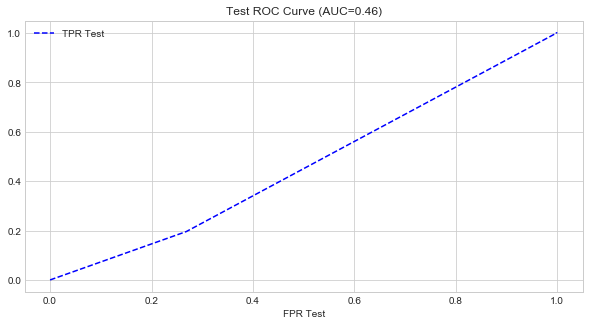

In [96]:
roc_test_rnn_df.plot(
    x="FPR Test",
    y="TPR Test",
    color="blue",
    style="--",
    xlim=([-0.05, 1.05]),
    figsize= (10,5),
    title=f"Test ROC Curve (AUC={auc_test_rnn})",
)